In [20]:
# Lets make a tree structure out of this
class Tree:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
    
    def put_left(self, value):
        if self.left:
            self.left.value = value
        else:
            self.left = Tree(value)
        return self.left
            
    def put_right(self, value):
        if self.right: 
            self.right.value = value
        else: 
            self.right = Tree(value)
        return self.right
    
    def walk(self, cb_f=None, cb_l=None, lvl=0):
        if cb_f: cb_f(self, lvl)
        if self.left: self.left.walk(cb_f, cb_l, lvl+1)
        if self.right: self.right.walk(cb_f, cb_l, lvl+1)
        if cb_l: cb_l(self, lvl)


root = Tree(2)

for dks in ['DD', 'DK', 'KK']:
    node = root
    for i in range(len(dks)):
        d_or_k = dks[i]
        if d_or_k == 'K':
            node = node.put_left(1)
        elif d_or_k == 'D':
            node = node.put_right(1)
        else:
            assert False
        
def print_tree(root):
    def _print_l(node, lv): 
        print(
            ''.join([' ']*lv*1),
            node.value
        )
    root.walk(_print_l)
    
print_tree(root)

 2
  1
   1
  1
   1
   1


In [21]:
def tree_to_lstring(node):
    if not node:
        return
    ret = ('l')
    if node.right:
        ret += ('[+')
        ret += tree_to_lstring(node.right)
        ret += (']')
    if node.left:
        ret += ('[-')
        ret += tree_to_lstring(node.left)
        ret += (']')
    return ret

tree_to_lstring(root)  

'l[+l[+l][-l]][-l[-l]]'

In [2]:
import numpy as np

In [4]:
import json
citation_data = json.load(open('tree_final.json'))
citation_data

[['Statistical Phrase-Based Translation_535',
  [[2003, 1],
   [2004, 0],
   [2005, 0],
   [2006, 0],
   [2007, 0],
   [2008, 0],
   [2009, 0],
   [2010, 0],
   [2011, 0],
   [2013, 0]]],
 ['Minimum Error Rate Training In Statistical Machine Translation_449',
  [[2004, 0],
   [2005, 0],
   [2006, 0],
   [2007, 0],
   [2008, 0],
   [2009, 0],
   [2010, 0],
   [2011, 0],
   [2013, 0]]],
 ['A Maximum-Entropy-Inspired Parser_432',
  [[2000, 0],
   [2001, 1],
   [2002, 0],
   [2003, 1],
   [2004, 0],
   [2005, 0],
   [2006, 0],
   [2007, 0],
   [2008, 0],
   [2009, 0],
   [2010, 0],
   [2011, 0],
   [2013, 0]]],
 ['A Hierarchical Phrase-Based Model For Statistical Machine Translation_339',
  [[2006, 0],
   [2007, 0],
   [2008, 1],
   [2009, 0],
   [2010, 0],
   [2011, 1],
   [2013, 0]]],
 ['Discriminative Training Methods For Hidden Markov Models: Theory And Experiments With Perceptron Algorithms_277',
  [[2003, 1],
   [2004, 0],
   [2005, 0],
   [2006, 0],
   [2007, 0],
   [2008, 0],
   [2

In [16]:
citation_data_dict = {}

for arti in citation_data:
    title, data = arti
    if title in citation_data_dict:
        print('[W] Duplicated:', title, data)
        print('    With      :', title, citation_data_dict[data], end='\n\n')
    citation_data_dict[title] = data
    
print(len(citation_data_dict), len(citation_data))

101 101


In [17]:
print(citation_data_dict)

{'Statistical Phrase-Based Translation_535': [[2003, 1], [2004, 0], [2005, 0], [2006, 0], [2007, 0], [2008, 0], [2009, 0], [2010, 0], [2011, 0], [2013, 0]], 'Minimum Error Rate Training In Statistical Machine Translation_449': [[2004, 0], [2005, 0], [2006, 0], [2007, 0], [2008, 0], [2009, 0], [2010, 0], [2011, 0], [2013, 0]], 'A Maximum-Entropy-Inspired Parser_432': [[2000, 0], [2001, 1], [2002, 0], [2003, 1], [2004, 0], [2005, 0], [2006, 0], [2007, 0], [2008, 0], [2009, 0], [2010, 0], [2011, 0], [2013, 0]], 'A Hierarchical Phrase-Based Model For Statistical Machine Translation_339': [[2006, 0], [2007, 0], [2008, 1], [2009, 0], [2010, 0], [2011, 1], [2013, 0]], 'Discriminative Training Methods For Hidden Markov Models: Theory And Experiments With Perceptron Algorithms_277': [[2003, 1], [2004, 0], [2005, 0], [2006, 0], [2007, 0], [2008, 0], [2009, 0], [2010, 0], [2011, 0], [2013, 0]], 'Coarse-To-Fine N-Best Parsing And MaxEnt Discriminative Reranking_271': [[2005, 1], [2006, 0], [2007, 

(array([ 4.,  0.,  4.,  0.,  0., 18.,  0., 13.,  0.,  0., 13.,  0.,  0.,
        17.,  0., 11.,  0.,  0., 10.,  0.,  0.,  7.,  0.,  1.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 3.  ,  3.38,  3.76,  4.14,  4.52,  4.9 ,  5.28,  5.66,  6.04,
         6.42,  6.8 ,  7.18,  7.56,  7.94,  8.32,  8.7 ,  9.08,  9.46,
         9.84, 10.22, 10.6 , 10.98, 11.36, 11.74, 12.12, 12.5 , 12.88,
        13.26, 13.64, 14.02, 14.4 , 14.78, 15.16, 15.54, 15.92, 16.3 ,
        16.68, 17.06, 17.44, 17.82, 18.2 , 18.58, 18.96, 19.34, 19.72,
        20.1 , 20.48, 20.86, 21.24, 21.62, 22.  ]),
 <a list of 50 Patch objects>)

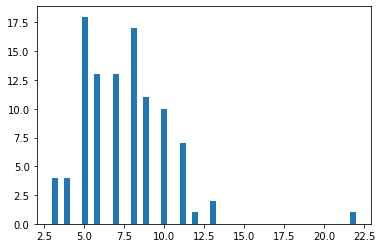

In [18]:
import matplotlib.pyplot as plt

plt.hist([(len(citation_data_dict[d])) for d in citation_data_dict], 50)

In [22]:
def generate_tree():
    root = Tree(None)
    for k in citation_data_dict:
        node = root
        for _, bi in citation_data_dict[k]:
            if bi == 0:
                node = node.put_left(1)
            elif bi == 1:
                node = node.put_right(1)
            else:
                assert False
    return root

root = generate_tree()
print(tree_to_lstring(root))  

l[+l[+l[+l[+l[-l[-l[-l[-l]]]]][-l[-l[-l]]]][-l[+l[-l[+l[+l[-l[-l[-l[-l]]]]]]]][-l[-l[-l[-l[-l[-l]]]]]]]][-l[+l[+l[-l[-l[-l[+l[-l]]]]]][-l[+l[-l[-l[-l[-l]]]]][-l[+l[-l[-l]]][-l[-l[-l[-l[+l[+l]]]]]]]]][-l[+l[+l[-l[-l[-l[-l[-l[-l[+l[-l[-l[+l[-l[-l[-l[-l[-l[-l[-l]]]]]]]]]]]]]]]]]][-l[-l[+l[-l]][-l[-l[-l]]]]]][-l[+l[-l[-l[-l]]]][-l[-l[+l[-l[-l[-l]]]][-l[-l[+l[+l[+l]]][-l[+l][-l]]]]]]]]]][-l[+l[+l[+l[-l[-l[-l[-l[-l[-l[-l]]]]]]]][-l[+l[-l[-l]]][-l[+l][-l]]]][-l[+l[-l[-l[-l[-l[-l[-l[-l[-l[-l]]]]]]]]]][-l[+l[-l[-l[-l[-l]]]]][-l[+l][-l[+l[-l]][-l[-l]]]]]]][-l[+l[+l[+l]][-l[+l[-l[-l[-l[-l]]]]][-l[+l[-l]][-l[-l[-l[-l[-l[-l[+l]]]]]]]]]][-l[+l[-l[+l[-l[-l[-l[-l[+l][-l]]]]]][-l[+l[-l]][-l[-l[-l]]]]]][-l[+l[+l[+l[-l[-l[-l[+l]]]]][-l[-l[-l[-l]]]]][-l[+l[-l[-l[+l]]]]]][-l[+l[-l]][-l[-l[+l[-l[-l]]][-l[-l[-l[-l[-l[-l]]]]]]]]]]]]]


In [24]:
%%javascript

function LogXY(x, y) {
  return Math.log(y) / Math.log(x);
}

// ----------------------------------------------------
// Treer2d by Arnaud Couturier, improve by Grayson Wen
var trees2d = {};
trees2d.tree = function (canvas2d) {
    this.canvas2d = canvas2d;
    this.ctx2d = canvas2d.getContext("2d");
    this.string = "lL[+L][-L]";
    this.branchTexture;
    this.treePosY = 50;
    this.iterations = 10;
    this.angleMean = 0.34;
    this.length = 29;
    this.lengthReduction = 0.28;
    this.thickness = 1;
    this.thicknessReduction = 1;
    this.rules = {
        L: {developsInto: ["l", "+lL", "-lL", "L[+LL][-LL]l", "[+L][-L]", "L[+lLL]", "L[-lLL]"]},
        l: {developsInto: ["l"]},
        "[": {developsInto: ["["]},
        "]": {developsInto: ["]"]},
        "+": {developsInto: ["+"]},
        "-": {developsInto: ["-"]}
    };
    this.leafTextures = [];
    this.leafScaleVariation = 0.5;
    this.leafMinDepth = 4;
    this.leafProba = 0.5;
    this.leafScale = 1;
    this.leafTotalPerBranch = 1;
    this.leafProbaLighterMult = 0.5
    this.shadowProba = 0;
    this.shadowAlpha = 0.025;
    this.shadowRadius = 0;
    this.leftColor = '#229b71';
    this.rightColor = '#982b6f';
};
trees2d.tree.prototype.addLeafTexture = function (a, b, c) {
    this.leafTextures.push({img: a, targetWidthInPixel: b, relativeProba: c})
};
trees2d.tree.prototype.generateLString = function () {
    // L-string expansion
    var _str = this.string;
    var lstring;

    for (var m = 0; m < this.iterations; m++) {
        lstring = "";
        for (var s = 0; s < _str.length; s++) {
            var _ch = _str[s];
            var _developsInto = this.rules[_ch].developsInto;
            if (_developsInto.length <= 0) {
                continue
            }
            // Randomly pick one of the devInto
            var a = _developsInto[parseInt(Math.random() * _developsInto.length)];

            lstring += a
        }
        _str = lstring
    }
    return lstring
};
trees2d.tree.prototype.removeLeafTexture = function (a) {
    for (var b = 0; b < this.leafTextures.length; b++) {
        var c = this.leafTextures[b];
        if (c.img == a) {
            this.leafTextures.splice(b, 1);
            break
        }
    }
};
trees2d.tree.prototype.hasLeafTexture = function (a) {
    for (var b = 0; b < this.leafTextures.length; b++) {
        var c = this.leafTextures[b];
        if (c.img == a) {
            return true
        }
    }
    return false
};
trees2d.tree.prototype.totalLeafTextures = function () {
    return this.leafTextures.length
};
trees2d.tree.prototype.draw = function (lstring) {
    for (var s = 0; s < this.leafTextures.length; s++) {
        var l = this.leafTextures[s];
        if (!l.img.complete) {
            return l.img.src.substring(0, 100) + " is not completely loaded, wait until all textures are loaded"
        }
        if (l.img.naturalWidth === 0 || l.img.naturalHeight === 0) {
            return l.img.src.substring(0, 100) + " is not a valid image"
        }
    }
    if (this.branchTexture) {
        if (!this.branchTexture.complete) {
            return this.branchTexture.src.substring(0, 100) + " is not completely loaded, wait until all textures are loaded"
        }
        if (this.branchTexture.naturalWidth === 0 || this.branchTexture.naturalHeight === 0) {
            return this.branchTexture.src.substring(0, 100) + " is not a valid image"
        }
    }
    var ctx = this.ctx2d;
    var err;
    ctx.setTransform(1, 0, 0, 1, 0, 0);
    ctx.save();
    try {

        var w = 0.1;
        var f = 1 / this.iterations;
        var strokeStyle = this.branchTexture ? this.ctx2d.createPattern(this.branchTexture, "repeat") : 'black';
        ctx.strokeStyle = strokeStyle;
        ctx.lineWidth = this.thickness;
        ctx.lineCap = "round";
        var p = 1;
        var h = 0;
        this.length = 65 * Math.pow(this.lengthReduction, 0.1*(p))
        ctx.clearRect(0, 0, this.canvas2d.width, this.canvas2d.height);
        ctx.translate(this.canvas2d.width / 2, this.canvas2d.height - this.treePosY);
        for (var s = 0; s < lstring.length; s++) {
            switch (lstring[s]) {
                case "l":
                    ctx.beginPath();
                    ctx.moveTo(0, 0);
                    ctx.quadraticCurveTo(0, - this.length / 2, 0, -this.length);
                    ctx.stroke();

                    if (Math.random() <= this.shadowProba) {
                        // Draw dark shadow
                        ctx.save();
                        ctx.globalCompositeOperation = "source-atop";
                        ctx.globalAlpha = this.shadowAlpha;
                        ctx.beginPath();
                        ctx.arc(0, 0, this.shadowRadius, 0, Math.PI * 2, false);
                        ctx.fill();
                        ctx.restore()
                    }
                    h++;
                    ctx.translate(0, -this.length);

                    // Draw leaf here
                    if (this.leafTextures.length > 0 && p >= this.leafMinDepth && Math.random() <= this.leafProba) {
                        for (var q = 0; q < this.leafTotalPerBranch; q++) {
                            ctx.save();
                            if (Math.random() <= (p / this.iterations * this.leafProbaLighterMult)) {
                                ctx.globalCompositeOperation = "lighter"
                            }
                            // Randomly pick a load leaf texture
                            var _leafTexture = this.leafTextures[parseInt(Math.random() * this.leafTextures.length)];
                            var u = _leafTexture.targetWidthInPixel / _leafTexture.img.naturalWidth * this.leafScale;

                            ctx.scale(
                                u * (1 + (Math.random() * 2 - 1) * this.leafScaleVariation),
                                u * (1 + (Math.random() * 2 - 1) * this.leafScaleVariation)
                            );
                            ctx.rotate(Math.random() * Math.PI * 2);
                            ctx.drawImage(_leafTexture.img, 0, 0);
                            ctx.restore()
                        }
                    }
                    break;
                case "+":
                    // Rotate left with variation
                    ctx.strokeStyle = this.leftColor;
                    ctx.rotate(this.angleMean);
                    break;
                case "-":
                    // Rotate right with variation
                    ctx.strokeStyle = this.rightColor;
                    ctx.rotate(-this.angleMean);
                    break;
                case "[":
                    ctx.save();
                    this.length = 65 * Math.pow(this.lengthReduction, 0.1*(p+1));
                    p++;
                    w += f;
                    ctx.lineWidth *= this.thicknessReduction;
                    break;
                case "]":
                    this.length = 65 * Math.pow(this.lengthReduction, 0.1*(p-1));
                    p--;
                    w -= f;
                    ctx.restore();
                    break;
            }
        }
    } catch (e) {
        err = e
    }
    ctx.restore();
    return err
};

// ----------------------------------------------------

require.config({
    paths: {
        'dat.gui': 'https://cdnjs.cloudflare.com/ajax/libs/dat-gui/0.7.6/dat.gui.min'
    }
});

(function(element) {
    var $canvas = $('<canvas width="800" height="500"></canvas>');
    var $controlContainer = $('<div style="position:absolute; right:0; top: 0"></div>');
    var $container = $('<div></div>');
    $container
        .append($controlContainer)
        .append($canvas);
    element.append($container);
    
    var treeGenParamValues = {
        tp_iterations: {min: 1, max: 16, step: 1}
    };
    var treeParamValues = {
        tp_angleMean: {min: 0, max: Math.PI / 4, step: Math.PI / 4 / 180},
        tp_thickness: {min: 1, max: 150, step: .1},
        tp_lengthReduction: {min: 0.001, max: 1},
        tp_thicknessReduction: {min: .5, max: 1, step: .01}
    };
    
    var tree = new trees2d.tree($canvas[0]);
    var data = {
        error: ''
    }
    var methods = {
        generate: () => { data.error = tree.draw(methods.lstring) },
        lstring: 'l[+l[+l[+l[+l[-l[-l[-l[-l]]]]][-l[-l[-l]]]][-l[+l[-l[+l[+l[-l[-l[-l[-l]]]]]]]][-l[-l[-l[-l[-l[-l]]]]]]]][-l[+l[+l[-l[-l[-l[+l[-l]]]]]][-l[+l[-l[-l[-l[-l]]]]][-l[+l[-l[-l]]][-l[-l[-l[-l[+l[+l]]]]]]]]][-l[+l[+l[-l[-l[-l[-l[-l[-l[+l[-l[-l[+l[-l[-l[-l[-l[-l[-l[-l]]]]]]]]]]]]]]]]]][-l[-l[+l[-l]][-l[-l[-l]]]]]][-l[+l[-l[-l[-l]]]][-l[-l[+l[-l[-l[-l]]]][-l[-l[+l[+l[+l]]][-l[+l][-l]]]]]]]]]][-l[+l[+l[+l[-l[-l[-l[-l[-l[-l[-l]]]]]]]][-l[+l[-l[-l]]][-l[+l][-l]]]][-l[+l[-l[-l[-l[-l[-l[-l[-l[-l[-l]]]]]]]]]][-l[+l[-l[-l[-l[-l]]]]][-l[+l][-l[+l[-l]][-l[-l]]]]]]][-l[+l[+l[+l]][-l[+l[-l[-l[-l[-l]]]]][-l[+l[-l]][-l[-l[-l[-l[-l[-l[+l]]]]]]]]]][-l[+l[-l[+l[-l[-l[-l[-l[+l][-l]]]]]][-l[+l[-l]][-l[-l[-l]]]]]][-l[+l[+l[+l[-l[-l[-l[+l]]]]][-l[-l[-l[-l]]]]][-l[+l[-l[-l[+l]]]]]][-l[+l[-l]][-l[-l[+l[-l[-l]]][-l[-l[-l[-l[-l[-l]]]]]]]]]]]]]'
    }
    data.error = tree.draw(methods.lstring);
    
    require(['dat.gui'], (dat) => {   
        
        var gui = new dat.GUI({autoPlace: false});
        $controlContainer.empty()
        $controlContainer.append(gui.domElement);
        
        gui.add(methods, 'lstring').onChange(() => methods.generate());
        gui.add(methods, 'generate');
        
        for (var _i in treeParamValues) {
            var p = _i.substring(3, _i.length);
            //console.log(tree, _i, p, treeParamValues);
            gui.add(tree, p, treeParamValues[_i].min, treeParamValues[_i].max)
                .onChange(() => data.error = tree.draw(methods.lstring));
        }
        
        gui.addColor(tree, 'leftColor').onChange(() => data.error = tree.draw(methods.lstring));
        gui.addColor(tree, 'rightColor').onChange(() => data.error = tree.draw(methods.lstring));
        
    })
})(element);


<IPython.core.display.Javascript object>

In [26]:
### Tree branch with weight

In [37]:
# Lets make a tree structure out of this
class AccTree(Tree):
    def __init__(self, value):
        super(AccTree, self).__init__(value)
    
    def add_left(self, value):
        if self.left:
            self.left.value += value
        else:
            self.left = AccTree(value)
        return self.left
            
    def add_right(self, value):
        if self.right: 
            self.right.value += value
        else: 
            self.right = AccTree(value)
        return self.right


root = AccTree(0)

for dks in ['DD', 'DK', 'KK']:
    node = root
    for i in range(len(dks)):
        d_or_k = dks[i]
        if d_or_k == 'K':
            node = node.add_left(1)
        elif d_or_k == 'D':
            node = node.add_right(1)
        else:
            assert False
        
def print_tree(root):
    def _print_l(node, lv): 
        print(
            ''.join([' ']*lv*1),
            node.value
        )
    root.walk(_print_l)
    
print_tree(root)

 0
  1
   1
  2
   1
   1


In [38]:
def tree_to_lstring(node):
    if not node:
        return
    ret = ('l' + str(node.value))
    if node.right:
        ret += ('[+')
        ret += tree_to_lstring(node.right)
        ret += (']')
    if node.left:
        ret += ('[-')
        ret += tree_to_lstring(node.left)
        ret += (']')
    return ret

tree_to_lstring(root)  

'l0[+l2[+l1][-l1]][-l1[-l1]]'

In [55]:
def generate_acc_tree():
    root = AccTree(0)
    for k in citation_data_dict:
        node = root
        for _, bi in citation_data_dict[k]:
            if bi == 0:
                node = node.add_left(1)
            elif bi == 1:
                node = node.add_right(1)
            else:
                assert False
    return root

root = generate_acc_tree()
root.value = max(root.left.value, root.right.value)
print(tree_to_lstring(root))  

l60[+l41[+l8[+l2[+l1[-l1[-l1[-l1[-l1]]]]][-l1[-l1[-l1]]]][-l6[+l1[-l1[+l1[+l1[-l1[-l1[-l1[-l1]]]]]]]][-l5[-l4[-l3[-l3[-l2[-l1]]]]]]]][-l33[+l7[+l1[-l1[-l1[-l1[+l1[-l1]]]]]][-l6[+l2[-l2[-l1[-l1[-l1]]]]][-l4[+l1[-l1[-l1]]][-l3[-l3[-l2[-l1[+l1[+l1]]]]]]]]][-l26[+l3[+l1[-l1[-l1[-l1[-l1[-l1[-l1[+l1[-l1[-l1[+l1[-l1[-l1[-l1[-l1[-l1[-l1[-l1]]]]]]]]]]]]]]]]]][-l2[-l2[+l1[-l1]][-l1[-l1[-l1]]]]]][-l23[+l3[-l3[-l2[-l2]]]][-l20[-l13[+l3[-l2[-l1[-l1]]]][-l9[-l7[+l1[+l1[+l1]]][-l4[+l1][-l3]]]]]]]]]][-l60[+l14[+l7[+l3[-l3[-l2[-l2[-l2[-l1[-l1[-l1]]]]]]]][-l3[+l1[-l1[-l1]]][-l2[+l1][-l1]]]][-l7[+l1[-l1[-l1[-l1[-l1[-l1[-l1[-l1[-l1[-l1]]]]]]]]]][-l6[+l1[-l1[-l1[-l1[-l1]]]]][-l4[+l1][-l3[+l1[-l1]][-l2[-l1]]]]]]][-l46[+l9[+l1[+l1]][-l8[+l1[-l1[-l1[-l1[-l1]]]]][-l6[+l1[-l1]][-l4[-l4[-l3[-l2[-l1[-l1[+l1]]]]]]]]]][-l37[+l4[-l4[+l2[-l2[-l2[-l2[-l2[+l1][-l1]]]]]][-l2[+l1[-l1]][-l1[-l1[-l1]]]]]][-l30[+l4[+l2[+l1[-l1[-l1[-l1[+l1]]]]][-l1[-l1[-l1[-l1]]]]][-l1[+l1[-l1[-l1[+l1]]]]]][-l25[+l2[-l1]][-l17[-l12[+l1[-l1[-

In [60]:
%%javascript

function LogXY(x, y) {
  return Math.log(y) / Math.log(x);
}

// ----------------------------------------------------
// Treer2d by Arnaud Couturier, improve by Grayson Wen
var trees2d = {};
trees2d.tree = function (canvas2d) {
    this.canvas2d = canvas2d;
    this.ctx2d = canvas2d.getContext("2d");
    this.string = "lL[+L][-L]";
    this.branchTexture;
    this.treePosY = 50;
    this.iterations = 10;
    this.angleMean = 0.34;
    this.length = 29;
    this.lengthReduction = 0.28;
    this.thickness = 1;
    this.thicknessReduction = 1;
    this.thicknessRatio = 15;
    this.rules = {
        L: {developsInto: ["l", "+lL", "-lL", "L[+LL][-LL]l", "[+L][-L]", "L[+lLL]", "L[-lLL]"]},
        l: {developsInto: ["l"]},
        "[": {developsInto: ["["]},
        "]": {developsInto: ["]"]},
        "+": {developsInto: ["+"]},
        "-": {developsInto: ["-"]}
    };
    this.leafTextures = [];
    this.leafScaleVariation = 0.5;
    this.leafMinDepth = 4;
    this.leafProba = 0.5;
    this.leafScale = 1;
    this.leafTotalPerBranch = 1;
    this.leafProbaLighterMult = 0.5
    this.shadowProba = 0;
    this.shadowAlpha = 0.025;
    this.shadowRadius = 0;
    this.leftColor = '#229b71';
    this.rightColor = '#982b6f';
};
trees2d.tree.prototype.addLeafTexture = function (a, b, c) {
    this.leafTextures.push({img: a, targetWidthInPixel: b, relativeProba: c})
};
trees2d.tree.prototype.generateLString = function () {
    // L-string expansion
    var _str = this.string;
    var lstring;

    for (var m = 0; m < this.iterations; m++) {
        lstring = "";
        for (var s = 0; s < _str.length; s++) {
            var _ch = _str[s];
            var _developsInto = this.rules[_ch].developsInto;
            if (_developsInto.length <= 0) {
                continue
            }
            // Randomly pick one of the devInto
            var a = _developsInto[parseInt(Math.random() * _developsInto.length)];

            lstring += a
        }
        _str = lstring
    }
    return lstring
};
trees2d.tree.prototype.removeLeafTexture = function (a) {
    for (var b = 0; b < this.leafTextures.length; b++) {
        var c = this.leafTextures[b];
        if (c.img == a) {
            this.leafTextures.splice(b, 1);
            break
        }
    }
};
trees2d.tree.prototype.hasLeafTexture = function (a) {
    for (var b = 0; b < this.leafTextures.length; b++) {
        var c = this.leafTextures[b];
        if (c.img == a) {
            return true
        }
    }
    return false
};
trees2d.tree.prototype.totalLeafTextures = function () {
    return this.leafTextures.length
};
trees2d.tree.prototype.draw = function (lstring) {
    for (var s = 0; s < this.leafTextures.length; s++) {
        var l = this.leafTextures[s];
        if (!l.img.complete) {
            return l.img.src.substring(0, 100) + " is not completely loaded, wait until all textures are loaded"
        }
        if (l.img.naturalWidth === 0 || l.img.naturalHeight === 0) {
            return l.img.src.substring(0, 100) + " is not a valid image"
        }
    }
    if (this.branchTexture) {
        if (!this.branchTexture.complete) {
            return this.branchTexture.src.substring(0, 100) + " is not completely loaded, wait until all textures are loaded"
        }
        if (this.branchTexture.naturalWidth === 0 || this.branchTexture.naturalHeight === 0) {
            return this.branchTexture.src.substring(0, 100) + " is not a valid image"
        }
    }
    var ctx = this.ctx2d;
    var err;
    ctx.setTransform(1, 0, 0, 1, 0, 0);
    ctx.save();
    try {

        var w = 0.1;
        var f = 1 / this.iterations;
        var strokeStyle = this.branchTexture ? this.ctx2d.createPattern(this.branchTexture, "repeat") : 'black';
        ctx.strokeStyle = strokeStyle;
        ctx.lineWidth = this.thickness;
        ctx.lineCap = "round";
        var p = 1;
        var h = 0;
        this.length = 65 * Math.pow(this.lengthReduction, 0.1*(p))
        ctx.clearRect(0, 0, this.canvas2d.width, this.canvas2d.height);
        ctx.translate(this.canvas2d.width / 2, this.canvas2d.height - this.treePosY);
        for (var s = 0; s < lstring.length; s++) {
            switch (lstring[s]) {
                case "l":
                    
                    // Match the weight number afterwards
                    var reg = lstring.slice(s+1).match(/\d+/);
                    if (reg) {
                        var weight = parseInt(reg[0]);
                        ctx.lineWidth = (weight + 1) / this.thicknessRatio + 1;
                        s += reg[0].length;
                    }
                    
                    ctx.beginPath();
                    ctx.moveTo(0, 0);
                    ctx.quadraticCurveTo(0, - this.length / 2, 0, -this.length);
                    ctx.stroke();

                    if (Math.random() <= this.shadowProba) {
                        // Draw dark shadow
                        ctx.save();
                        ctx.globalCompositeOperation = "source-atop";
                        ctx.globalAlpha = this.shadowAlpha;
                        ctx.beginPath();
                        ctx.arc(0, 0, this.shadowRadius, 0, Math.PI * 2, false);
                        ctx.fill();
                        ctx.restore()
                    }
                    h++;
                    ctx.translate(0, -this.length);

                    // Draw leaf here
                    if (this.leafTextures.length > 0 && p >= this.leafMinDepth && Math.random() <= this.leafProba) {
                        for (var q = 0; q < this.leafTotalPerBranch; q++) {
                            ctx.save();
                            if (Math.random() <= (p / this.iterations * this.leafProbaLighterMult)) {
                                ctx.globalCompositeOperation = "lighter"
                            }
                            // Randomly pick a load leaf texture
                            var _leafTexture = this.leafTextures[parseInt(Math.random() * this.leafTextures.length)];
                            var u = _leafTexture.targetWidthInPixel / _leafTexture.img.naturalWidth * this.leafScale;

                            ctx.scale(
                                u * (1 + (Math.random() * 2 - 1) * this.leafScaleVariation),
                                u * (1 + (Math.random() * 2 - 1) * this.leafScaleVariation)
                            );
                            ctx.rotate(Math.random() * Math.PI * 2);
                            ctx.drawImage(_leafTexture.img, 0, 0);
                            ctx.restore()
                        }
                    }
                    break;
                case "+":
                    // Rotate left with variation
                    ctx.strokeStyle = this.leftColor;
                    ctx.rotate(this.angleMean);
                    break;
                case "-":
                    // Rotate right with variation
                    ctx.strokeStyle = this.rightColor;
                    ctx.rotate(-this.angleMean);
                    break;
                case "[":
                    ctx.save();
                    this.length = 65 * Math.pow(this.lengthReduction, 0.1*(p+1));
                    p++;
                    w += f;
                    ctx.lineWidth *= this.thicknessReduction;
                    break;
                case "]":
                    this.length = 65 * Math.pow(this.lengthReduction, 0.1*(p-1));
                    p--;
                    w -= f;
                    ctx.restore();
                    break;
            }
        }
    } catch (e) {
        err = e
    }
    ctx.restore();
    return err
};

// ----------------------------------------------------

require.config({
    paths: {
        'dat.gui': 'https://cdnjs.cloudflare.com/ajax/libs/dat-gui/0.7.6/dat.gui.min'
    }
});

(function(element) {
    var $canvas = $('<canvas width="800" height="500"></canvas>');
    var $controlContainer = $('<div style="position:absolute; right:0; top: 0"></div>');
    var $container = $('<div></div>');
    $container
        .append($controlContainer)
        .append($canvas);
    element.append($container);
    
    var treeGenParamValues = {
        tp_iterations: {min: 1, max: 16, step: 1}
    };
    var treeParamValues = {
        tp_angleMean: {min: 0, max: Math.PI / 4, step: Math.PI / 4 / 180},
        tp_lengthReduction: {min: 0.001, max: 1},
        tp_thicknessRatio: {min: 1, max: 100, step: 1}
    };
    
    var tree = new trees2d.tree($canvas[0]);
    var data = {
        error: ''
    }
    var methods = {
        generate: () => { data.error = tree.draw(methods.lstring) },
        lstring: 'l60[+l41[+l8[+l2[+l1[-l1[-l1[-l1[-l1]]]]][-l1[-l1[-l1]]]][-l6[+l1[-l1[+l1[+l1[-l1[-l1[-l1[-l1]]]]]]]][-l5[-l4[-l3[-l3[-l2[-l1]]]]]]]][-l33[+l7[+l1[-l1[-l1[-l1[+l1[-l1]]]]]][-l6[+l2[-l2[-l1[-l1[-l1]]]]][-l4[+l1[-l1[-l1]]][-l3[-l3[-l2[-l1[+l1[+l1]]]]]]]]][-l26[+l3[+l1[-l1[-l1[-l1[-l1[-l1[-l1[+l1[-l1[-l1[+l1[-l1[-l1[-l1[-l1[-l1[-l1[-l1]]]]]]]]]]]]]]]]]][-l2[-l2[+l1[-l1]][-l1[-l1[-l1]]]]]][-l23[+l3[-l3[-l2[-l2]]]][-l20[-l13[+l3[-l2[-l1[-l1]]]][-l9[-l7[+l1[+l1[+l1]]][-l4[+l1][-l3]]]]]]]]]][-l60[+l14[+l7[+l3[-l3[-l2[-l2[-l2[-l1[-l1[-l1]]]]]]]][-l3[+l1[-l1[-l1]]][-l2[+l1][-l1]]]][-l7[+l1[-l1[-l1[-l1[-l1[-l1[-l1[-l1[-l1[-l1]]]]]]]]]][-l6[+l1[-l1[-l1[-l1[-l1]]]]][-l4[+l1][-l3[+l1[-l1]][-l2[-l1]]]]]]][-l46[+l9[+l1[+l1]][-l8[+l1[-l1[-l1[-l1[-l1]]]]][-l6[+l1[-l1]][-l4[-l4[-l3[-l2[-l1[-l1[+l1]]]]]]]]]][-l37[+l4[-l4[+l2[-l2[-l2[-l2[-l2[+l1][-l1]]]]]][-l2[+l1[-l1]][-l1[-l1[-l1]]]]]][-l30[+l4[+l2[+l1[-l1[-l1[-l1[+l1]]]]][-l1[-l1[-l1[-l1]]]]][-l1[+l1[-l1[-l1[+l1]]]]]][-l25[+l2[-l1]][-l17[-l12[+l1[-l1[-l1]]][-l8[-l6[-l3[-l1[-l1[-l1]]]]]]]]]]]]]'
    }
    data.error = tree.draw(methods.lstring);
    
    require(['dat.gui'], (dat) => {   
        
        var gui = new dat.GUI({autoPlace: false});
        $controlContainer.empty()
        $controlContainer.append(gui.domElement);
        
        gui.add(methods, 'lstring').onChange(() => methods.generate());
        gui.add(methods, 'generate');
        
        for (var _i in treeParamValues) {
            var p = _i.substring(3, _i.length);
            //console.log(tree, _i, p, treeParamValues);
            gui.add(tree, p, treeParamValues[_i].min, treeParamValues[_i].max)
                .onChange(() => data.error = tree.draw(methods.lstring));
        }
        
        gui.addColor(tree, 'leftColor').onChange(() => data.error = tree.draw(methods.lstring));
        gui.addColor(tree, 'rightColor').onChange(() => data.error = tree.draw(methods.lstring));
        
    })
})(element);


<IPython.core.display.Javascript object>